In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ddim_20_pth = '/fastdata/users/nadavg/sd/qdiff/gen_stats/ddim_steps_20.pt'
ddim_50_pth = '/fastdata/users/nadavg/sd/qdiff/gen_stats/ddim_steps_50.pt'

In [4]:
ddim_20 = torch.load(ddim_20_pth)
ddim_50 = torch.load(ddim_50_pth)

/tmp/ipykernel_3891536/1647031419.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ddim_20 = torch.load(ddim_20_pth)
/tmp/ipykernel_3891536/1647031419.py:2: FutureWarning

In [8]:
k = list(ddim_20.keys())

In [132]:
len(k[12:])

12

In [70]:
len(k)#[0]

24

In [23]:
ddim_20[k[0]][0]['mean'].shape[-1]

4

In [27]:
def get_box_data(ddim,k,step):
    data = ddim[k]
    data = data[step]
    
    box_data = np.zeros((5, data['mean'].shape[-1]))
    box_data[0] = data['min'][0]
    box_data[4] = data['max'][0]
    box_data[2] = data['mean'][0]
    std = np.sqrt(data['var'])
    box_data[1] = data['mean'][0] - 0.6745*std
    box_data[3] = data['mean'][0] + 0.6745*std

    #box_data = box_data.T
    return box_data

        
    


In [47]:
box_data = get_box_data(ddim_20,k[0],15)

In [113]:
box_data.shape

(5, 640)

In [133]:
from mo_utils.utils.plot_aux import flatten

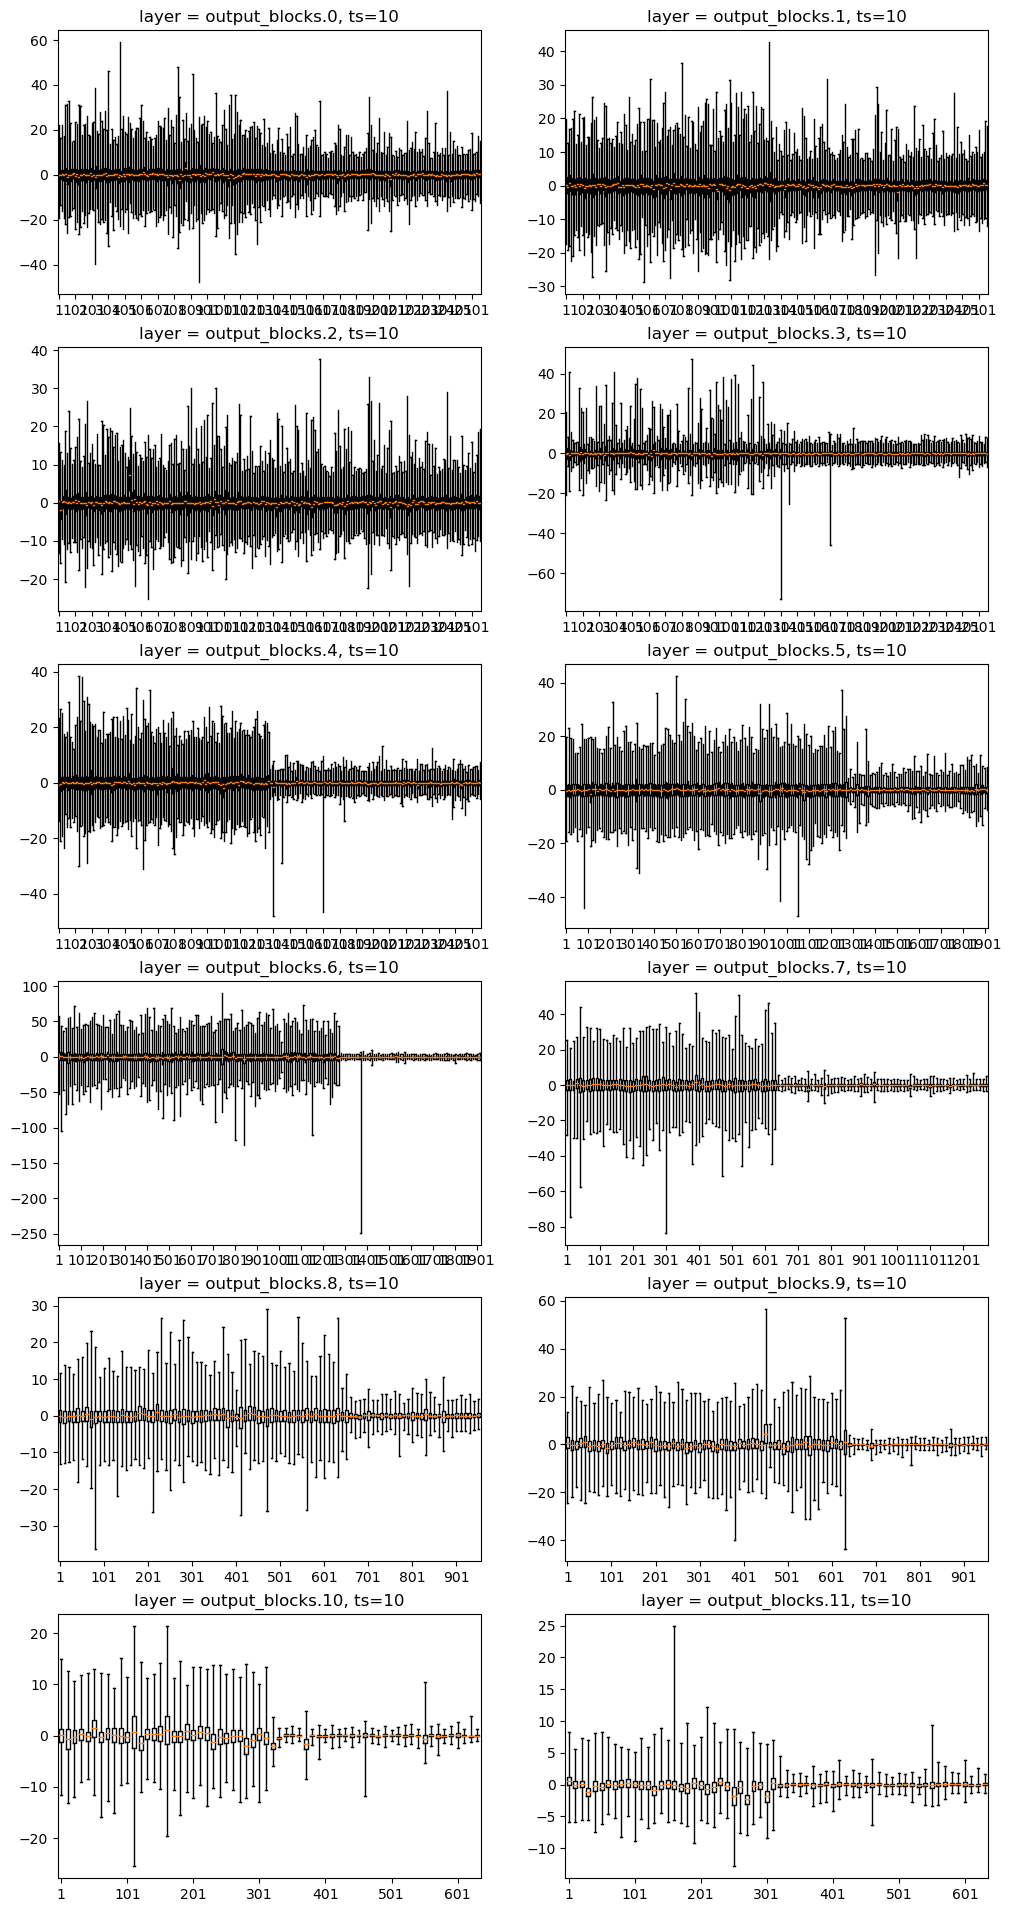

In [141]:
fig,ax = plt.subplots(6,2, figsize=(12, 4*6))
ax = flatten(ax)
#k_ind = 18; 
ts = 10
for ind in range(12):
    box_data = get_box_data(ddim_20,k[12+ind],ts)
    #box_data = get_box_data(ddim_50,k[k_ind],ts)
    #print(f'layer = {k[k_ind]}, {ts=}')

    channel_ind = list(range(1,box_data.shape[1]+1))
    if channel_ind[-1] > 100:
        channel_ind_sample = channel_ind[::10]
    box_data = box_data[:,channel_ind_sample]
    channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

    #boxplot
    # Create a figure instance

    _=ax[ind].bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
        showfliers=False, widths=0.6)
    #ax.set_xticklabels(list(range(box_data.shape[1])))
    #_=ax.set_xticks(channel_ind_sample[::10])
    #_=ax.set_xticklabels(channel_ind_sample[::10])
    _=ax[ind].set_xticks(channel_ind_ticks[::10])
    _=ax[ind].set_xticklabels(channel_ind_sample[::10])
    ax[ind].set_title(f'layer = {k[12+ind]}, {ts=}')



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 


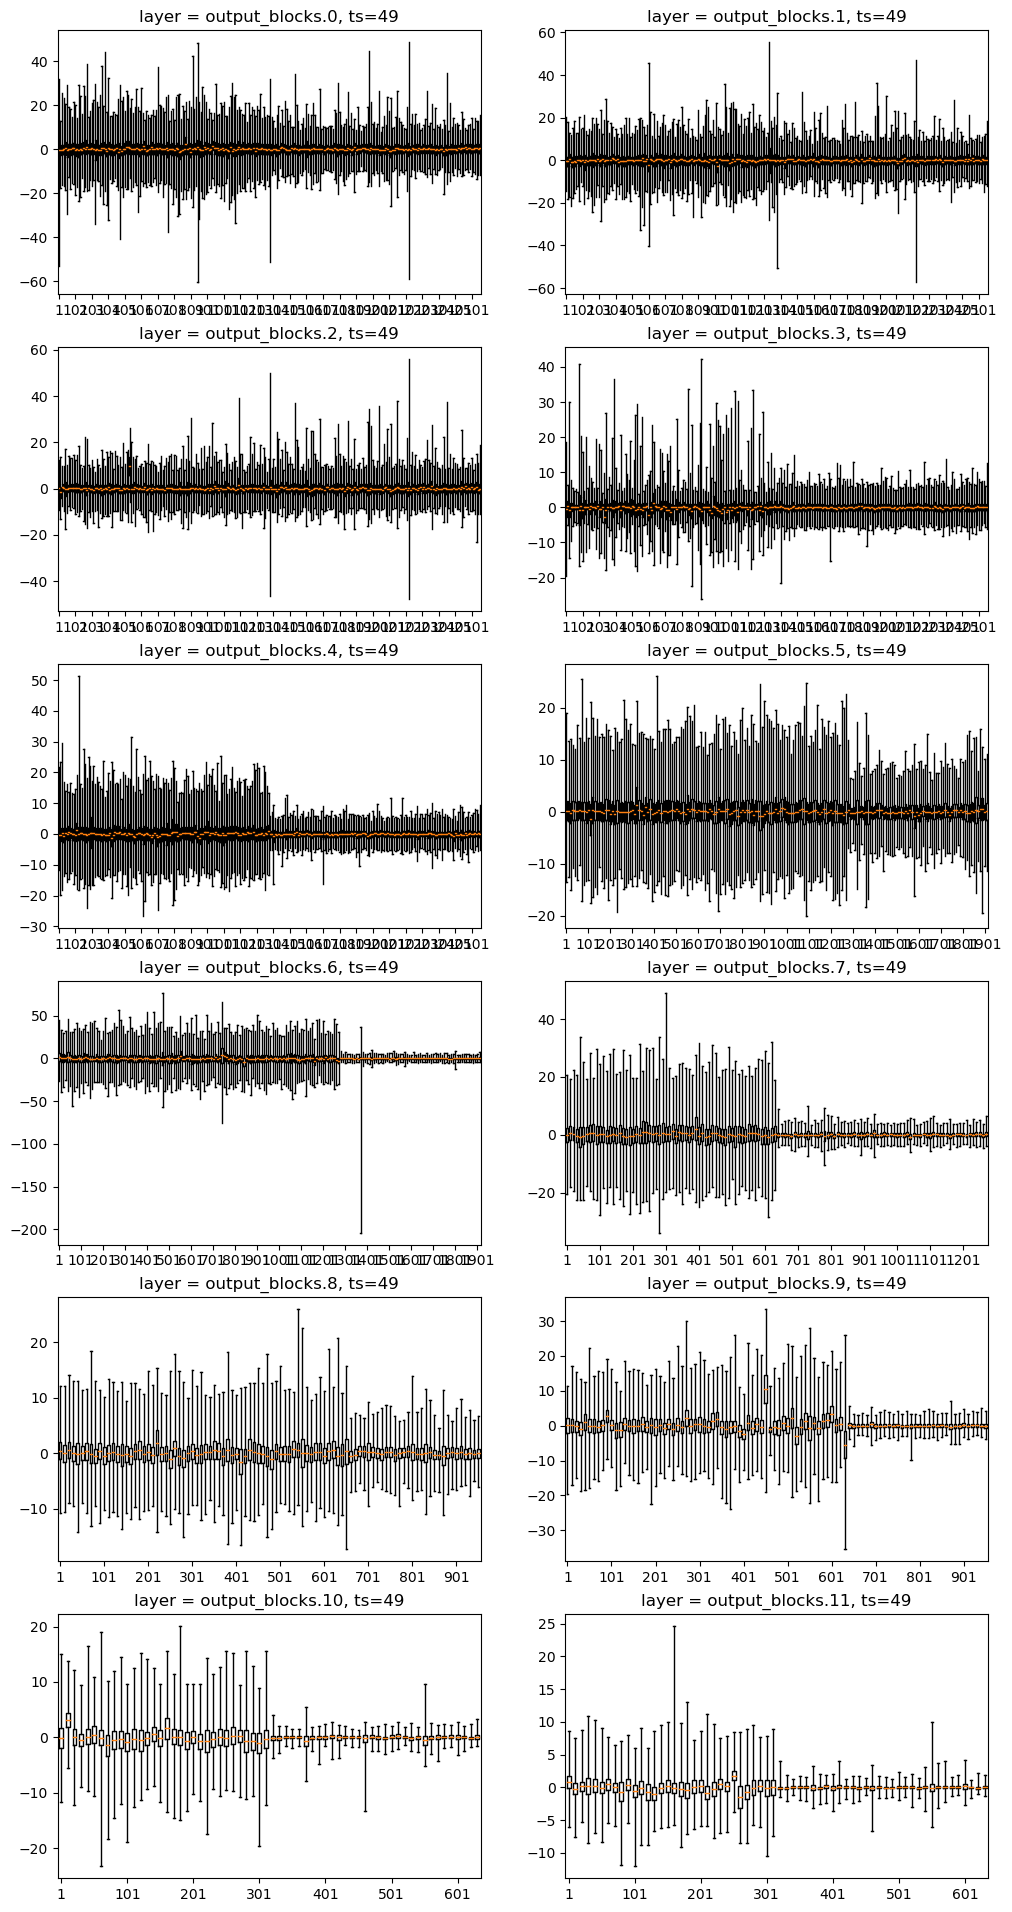

In [144]:
fig,ax = plt.subplots(6,2, figsize=(12, 4*6))
ax = flatten(ax)
#k_ind = 18; 
ts = 49
for ind in range(12):
    box_data = get_box_data(ddim_50,k[12+ind],ts)
    #box_data = get_box_data(ddim_50,k[k_ind],ts)
    #print(f'layer = {k[k_ind]}, {ts=}')

    channel_ind = list(range(1,box_data.shape[1]+1))
    if channel_ind[-1] > 100:
        channel_ind_sample = channel_ind[::10]
    box_data = box_data[:,channel_ind_sample]
    channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

    #boxplot
    # Create a figure instance

    _=ax[ind].bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
        showfliers=False, widths=0.6)
    #ax.set_xticklabels(list(range(box_data.shape[1])))
    #_=ax.set_xticks(channel_ind_sample[::10])
    #_=ax.set_xticklabels(channel_ind_sample[::10])
    _=ax[ind].set_xticks(channel_ind_ticks[::10])
    _=ax[ind].set_xticklabels(channel_ind_sample[::10])
    ax[ind].set_title(f'layer = {k[12+ind]}, {ts=}')



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 


layer = output_blocks.6, ts=0


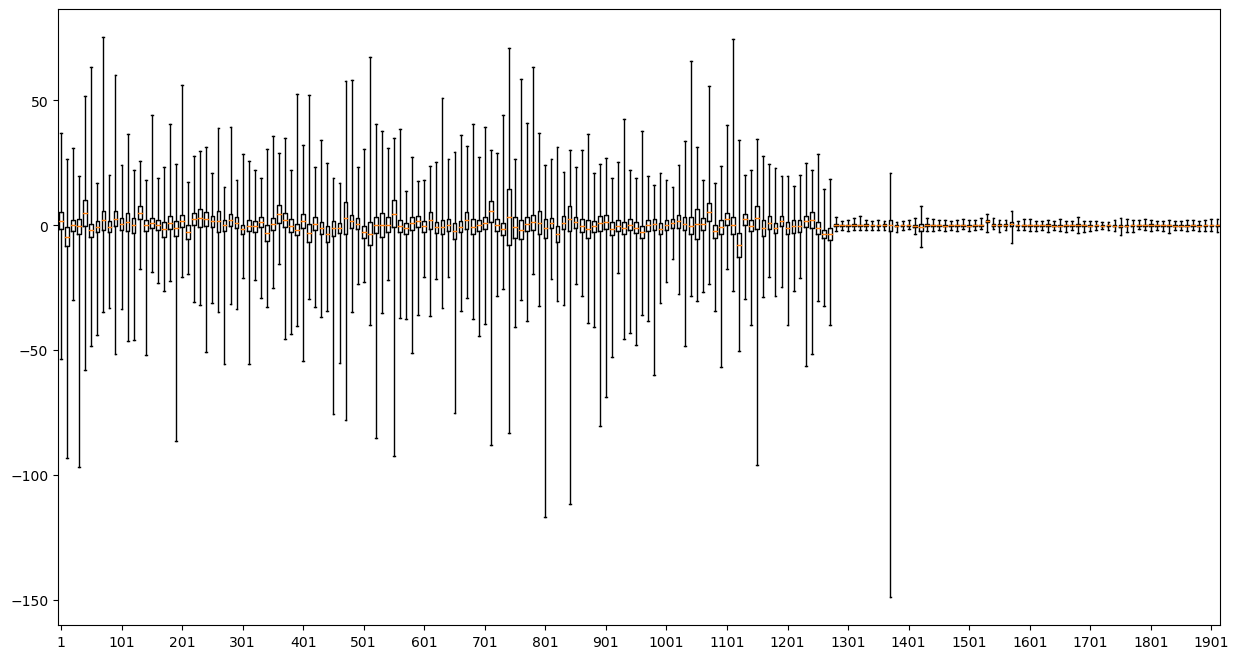

In [ ]:
k_ind = 18; ts = 0
box_data = get_box_data(ddim_20,k[k_ind],ts)
#box_data = get_box_data(ddim_50,k[k_ind],ts)
print(f'layer = {k[k_ind]}, {ts=}')

channel_ind = list(range(1,box_data.shape[1]+1))
if channel_ind[-1] > 100:
    channel_ind_sample = channel_ind[::10]
box_data = box_data[:,channel_ind_sample]
channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

#boxplot
# Create a figure instance
fig,ax = plt.subplots(1,1, figsize=(15, 8))
_=ax.bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
       showfliers=False, widths=0.6)
#ax.set_xticklabels(list(range(box_data.shape[1])))
#_=ax.set_xticks(channel_ind_sample[::10])
#_=ax.set_xticklabels(channel_ind_sample[::10])
_=ax.set_xticks(channel_ind_ticks[::10])
_=ax.set_xticklabels(channel_ind_sample[::10])



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 
